# Dataset

Se incluyen dos conjuntos de datos, relacionados con muestras de Vinho Verde Tinto y Blanco, del norte de Portugal. El objetivo es modelar la calidad del vino en base a pruebas fisicoquímicas.
<br/>**Reconocimiento**
<br/>Enlace https://archive.ics.uci.edu/ml/datasets/wine+quality

In [96]:
# Librerias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# TrainTestSplit GSCV CV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Standard scaler
from sklearn.preprocessing import StandardScaler
# KNN & Clasificador
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# Pipelines
from sklearn.pipeline import make_pipeline
#
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [77]:
urlr = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
urlb = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
tinto_df = pd.read_csv(urlr, delimiter=";")
blanco_df = pd.read_csv(urlb, delimiter=";")
tinto_df.info()
blanco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

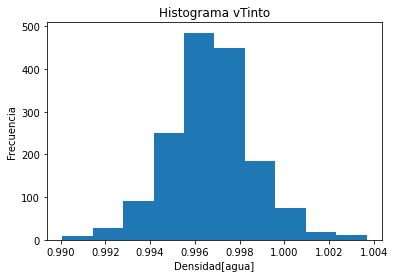

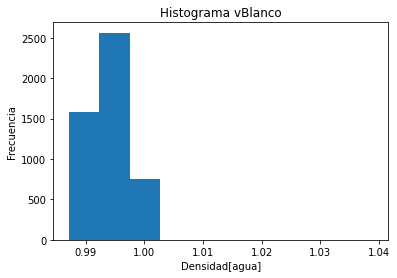

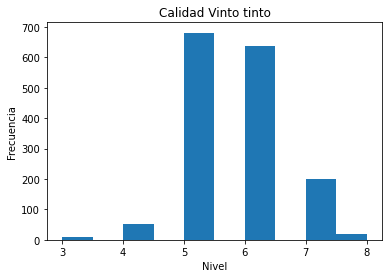

In [78]:
dt = tinto_df['density']
db = blanco_df['density']
dq = tinto_df['quality']
bins = 10


plt.hist(dt,bins)
plt.title("Histograma vTinto")
plt.xlabel("Densidad[agua]")
plt.ylabel("Frecuencia")
plt.show()
plt.hist(db,bins)
plt.title("Histograma vBlanco")
plt.xlabel("Densidad[agua]")
plt.ylabel("Frecuencia")
plt.show()
plt.hist(dq,bins)
plt.title("Calidad Vinto tinto")
plt.xlabel("Nivel")
plt.ylabel("Frecuencia")
plt.show()

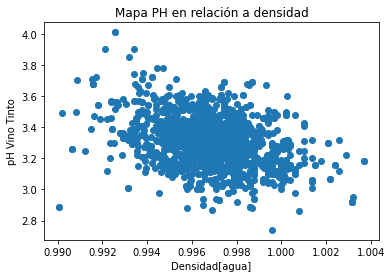

In [79]:
pht = tinto_df["pH"]

plt.scatter(dt, pht)
plt.title("Mapa PH en relación a densidad")
plt.xlabel("Densidad[agua]")
plt.ylabel("pH Vino Tinto")
plt.show()

# Modelado de Datos

Creamos la matriz de dimensiones con las características que influyen en la calidad del vino

In [80]:
# Separamos matriz de caracteristicas/dimensiones que influyen en la calidad del vino
dim = ['citric acid','alcohol','residual sugar','pH','total sulfur dioxide']  

x = tinto_df[dim]
y = tinto_df['quality']  

In [81]:
from sklearn.preprocessing import LabelEncoder
lenc =LabelEncoder()
y= lenc.fit_transform(y)

Efectuamos un split a los datos y su respectiva estandarización, inicialmente vamos a tomar un acercamiento de data normalizada (según el histograma de densidad de agua y el plot de puntos de pH de vino tinto).

In [82]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1 , random_state=9,shuffle=True)

In [83]:
stdc = StandardScaler()
train_x=stdc.fit_transform(train_x)
test_x=stdc.fit_transform(test_x)

In [84]:
Knn = KNeighborsClassifier(n_neighbors=6,p=1)
Knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=6, p=1)

In [85]:
y_pred=Knn.predict(test_x)
y_pred
test_y
confu = confusion_matrix(test_y,y_pred)
confu

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  2,  2,  0,  0],
       [ 0,  1, 53, 13,  1,  0],
       [ 0,  0, 35, 28,  6,  0],
       [ 0,  0,  3,  6,  7,  0],
       [ 0,  0,  0,  1,  1,  0]])

In [86]:
print('Porcentaje de precisión con KNN : ',100*accuracy_score(test_y,y_pred))

Porcentaje de precisión con KNN :  55.00000000000001


In [87]:
def qualityCategory(quality):
    if quality < 6:
        return "bad"
    elif quality == 6:
        return "normal"
    else:
        return "good"

In [88]:
tinto_dfc = tinto_df

In [89]:
tinto_dfc['quality'] = tinto_df['quality'].apply(lambda quality: qualityCategory(quality))

In [90]:
clasX = tinto_dfc.drop('quality', axis=1)
clasy = tinto_dfc['quality']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(clasX, clasy, test_size=.1, 
                                                    random_state=102)

Iteramos entre modelos para encontrar el óptimo

In [101]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test  = label_encoder.transform(y_test) 
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [102]:
model_params={
    'linear_regression':{
      'model':LinearRegression(),
        'params':{
        'normalize':[True,False]
    }
    },
    'lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[1,2],
            'selection':['cyclic','random']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10, 20, 30, 50]
        }
    },
     'desicion_tree':{
            'model':DecisionTreeClassifier(),
            'params':{
                'criterion':['ginni','entropy'],
                'splitter':['best','random']
            }
        },
    "xgboost":{
        "model":XGBClassifier(),
        "params":{
            "n_estimators":[10, 20, 30, 40, 50, 100]
        }
    },
    "ExtraTreesClassifier":{
        "model":ExtraTreesClassifier(),
        "params":{
            "n_estimators":[50, 100, 150, 200]
        }
    }
}
scores = []

for model_name, model_params in model_params.items():
    classifier = GridSearchCV(model_params["model"], model_params["params"], cv= 5, return_train_score=False)
    classifier.fit(X_train, y_train)
    scores.append({
        "model":model_name,
        "best_params":classifier.best_params_,
        "best_score": classifier.best_score_
    })

pd.DataFrame(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_params,best_score
0,linear_regression,{'normalize': False},0.165840
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",-0.003404
2,random_forest,{'n_estimators': 30},0.721997
3,desicion_tree,"{'criterion': 'entropy', 'splitter': 'random'}",0.633062
4,xgboost,{'n_estimators': 100},0.667794
5,ExtraTreesClassifier,{'n_estimators': 200},0.724073
